In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# Import dataset
df = pd.read_csv("Country-data.csv")
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
#shape of dataframe
df.shape

(167, 10)

In [5]:
#info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
#inspecting null values
round(100*(df.isnull().sum()/len(df.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
#inspecting overall statistics
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [8]:
#check foe duplicates and drop it
df=df.drop_duplicates(keep='first')
df.shape

(167, 10)

In [9]:
#drop country  column but  preserve it for further  analysis
country=df.country
country.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [10]:
#drop country column now after  preserving
df.drop('country', axis=1, inplace=True) 
df.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [11]:
#Standardisation
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(df)
df1 = pd.DataFrame(df1)
df1.head()

0         1         2         3         4         5         6  \
0  1.291532 -1.138280  0.279088 -0.082455 -0.808245  0.157336 -1.619092   
1 -0.538949 -0.479658 -0.097016  0.070837 -0.375369 -0.312347  0.647866   
2 -0.272833 -0.099122 -0.966073 -0.641762 -0.220844  0.789274  0.670423   
3  2.007808  0.775381 -1.448071 -0.165315 -0.585043  1.387054 -1.179234   
4 -0.695634  0.160668 -0.286894  0.497568  0.101732 -0.601749  0.704258   

          7         8  
0  1.902882 -0.679180  
1 -0.859973 -0.485623  
2 -0.038404 -0.465376  
3  2.128151 -0.516268  
4 -0.541946 -0.041817

In [12]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [13]:
#Doing the PCA on df1
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [14]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [15]:
colnames = list(df.columns)
pcs_df1 = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df1.head()

Feature       PC1       PC2
0  child_mort -0.419519  0.192884
1     exports  0.283897  0.613163
2      health  0.150838 -0.243087
3     imports  0.161482  0.671821
4      income  0.398441  0.022536

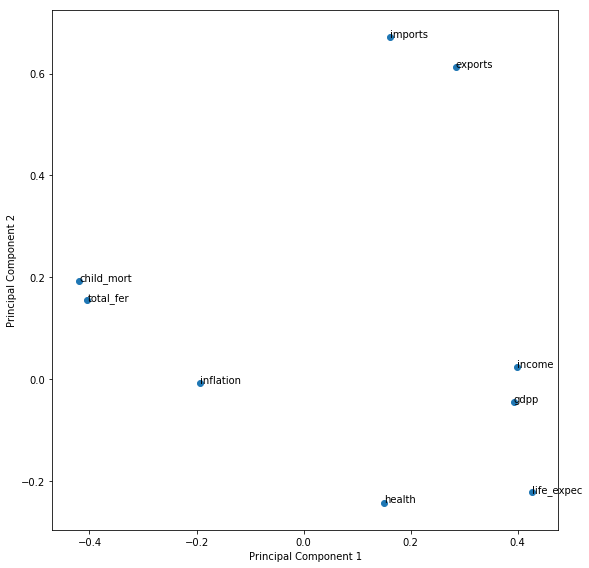

In [16]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df1.PC1, pcs_df1.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df1.Feature):
    plt.annotate(txt, (pcs_df1.PC1[i],pcs_df1.PC2[i]))
plt.tight_layout()
plt.show()

In [17]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [18]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [19]:
#as the 5 components explain 95% of variance
#take only 5 pca components
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [20]:
np_pca = pca_final.fit_transform(df1)
np_pca.shape

(167, 5)

In [21]:
#Create transpose of the array
pc = np.transpose(np_pca)
final_pca_df1 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3], 'PC5':pc[4]})
final_pca_df1

PC1       PC2       PC3       PC4       PC5
0   -2.913000  0.091969 -0.721242  1.001838 -0.146765
1    0.429870 -0.589373 -0.328611 -1.165014  0.153205
2   -0.285289 -0.452139  1.232051 -0.857767  0.191227
3   -2.932714  1.698771  1.525076  0.855595 -0.214778
4    1.033371  0.133853 -0.216699 -0.846638 -0.193186
5    0.022890 -1.772736  0.864500 -0.036747  0.997895
6   -0.101463 -0.567318  0.248107 -1.466023 -0.085832
7    2.342153 -1.989710  0.198795  1.113413 -0.710654
8    2.973841 -0.735152 -0.528284  1.201101  0.080167
9   -0.181303 -0.396895  0.868399 -0.435201  0.120357
10   1.268740 -0.658658 -0.484555  0.053945 -0.398859
11   1.671024  0.563934  0.997464 -0.197912 -0.378991
12  -1.123979 -0.961083  0.542964 -1.189204 -0.688348
13   1.081196 -0.484983 -0.658991 -0.526571 -0.008862
14   0.580574  0.541405  0.471986 -1.042085  0.784712
15   3.143756  0.662482 -0.659855  1.087644  0.445979
16   0.210908  0.695633 -0.261731 -1.094244 -0.285266
17  -2.673005  0.411199 -0.237232  0.289668 -1.411854
18  -0.156696  0.776113 -0.279266 -1.042724  0.097584
19  -0.794151 -0.120997  0.414132 -0.717824 -0.206041
20   0.995909 -0.974806 -1.534071 -0.638488  0.900375
21  -0.881576  0.460256 -0.602232  0.394024  0.248934
22   0.141007 -2.149631 -0.169567 -0.170220  0.284366
23   2.460675  0.028279  3.022549  0.801236 -1.015430
24   0.906504  0.028728 -0.465601 -0.999039 -0.018948
25  -3.122430  0.034132 -0.448309  1.085256 -0.705788
26  -2.898911 -0.426694 -1.360086  1.809782  0.742353
27  -0.582622  0.892420 -0.494662 -0.808601 -0.156298
28  -2.808332  0.073705 -0.327757  0.551092 -1.313929
29   2.543776 -1.727357 -0.401760  1.334434  0.070455
..        ...       ...       ...       ...       ...
137 -1.191245 -0.553842 -0.730236  0.538689 -0.109324
138  1.918016 -0.427112  0.145716 -0.470615 -0.136314
139  2.019143 -1.786179 -0.373238  0.264334 -0.194777
140 -0.575132 -0.989932  1.755726 -1.369302  0.473650
141  0.026671 -0.016991 -0.033020 -1.225350 -0.296906
142 -2.319441 -0.767381  0.735848  0.499157  0.297274
143  0.171654 -0.094243  0.016510 -0.377212  0.110093
144  2.818263 -0.915851 -0.101273  1.245701 -0.309937
145  4.088623 -0.429291 -0.276359  2.306719 -0.184681
146 -1.244377 -0.029404 -0.153758 -0.485148  0.417518
147 -2.554170 -0.217996 -0.077956  0.467171 -0.444480
148  0.925809  0.827979  0.352726 -1.591559 -0.193911
149 -2.371889 -1.176966  0.392827  1.159493  1.418366
150 -1.997994  0.952271 -1.217241  0.555483 -0.395010
151 -0.755117 -0.093367 -0.410624 -0.854013 -0.266630
152  0.601940  0.171081 -0.234296 -1.118931  0.140118
153  0.401370 -1.412286  0.237246 -0.559342 -0.070378
154 -0.464512  1.290702  0.618455 -0.927497 -1.085312
155 -2.854881 -0.355787 -0.699311  1.294060  0.089552
156  0.302728 -0.092996 -0.103870 -0.890837  1.034368
157  2.427491  1.159100  1.822990  0.288816 -0.462769
158  2.067999 -1.536828 -0.249088  0.792830 -0.223893
159  2.641648 -2.998696 -1.741034  2.809826  0.816417
160  0.617287 -1.431525 -0.235307 -0.359604  0.118536
161 -0.853238 -0.649521  0.617276 -0.722564  0.492597
162 -0.820753  0.636404 -0.379488 -0.706886 -0.400381
163 -0.549894 -1.215018  3.074556 -0.108594  2.114025
164  0.498570  1.392777 -0.252849 -1.085037  1.156471
165 -1.887294 -0.105397  1.107639  0.062636  0.665467
166 -2.863885  0.487336  0.221918  0.818991 -0.265921

[167 rows x 5 columns]

In [22]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(np_pca.transpose())

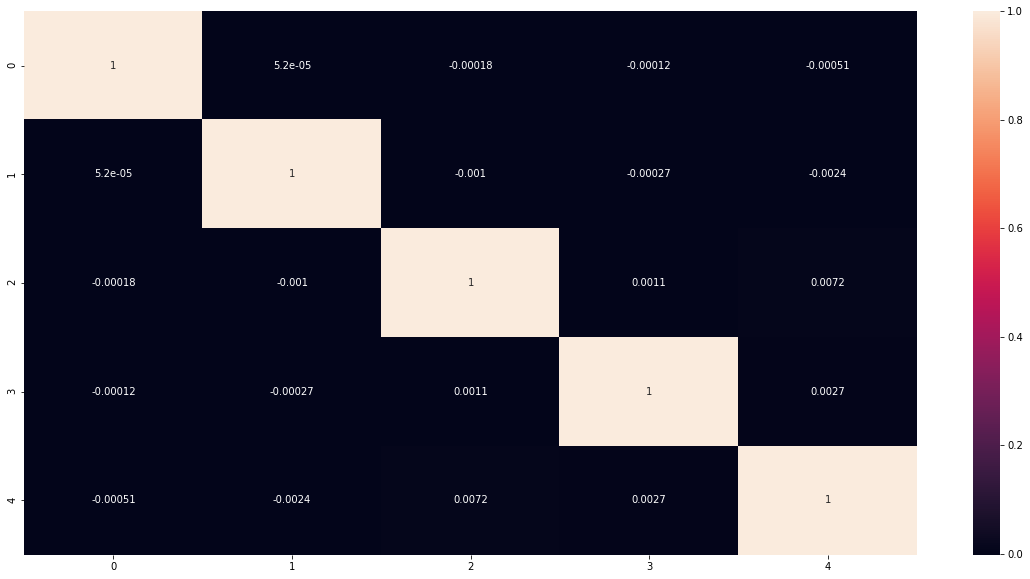

In [23]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [24]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.007194543060491426 , min corr:  -0.002374704497495838


In [25]:
complete_df = pd.concat([df, country, final_pca_df1], axis=1)
complete_df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2    10.00    7.58     44.9    1610      9.440        56.2   
1          16.6    28.00    6.55     48.6    9930      4.490        76.3   
2          27.3    38.40    4.17     31.4   12900     16.100        76.5   
3         119.0    62.30    2.85     42.9    5900     22.400        60.1   
4          10.3    45.50    6.03     58.9   19100      1.440        76.8   
5          14.5    18.90    8.10     16.0   18700     20.900        75.8   
6          18.1    20.80    4.40     45.3    6700      7.770        73.3   
7           4.8    19.80    8.73     20.9   41400      1.160        82.0   
8           4.3    51.30   11.00     47.8   43200      0.873        80.5   
9          39.2    54.30    5.88     20.7   16000     13.800        69.1   
10         13.8    35.00    7.89     43.7   22900     -0.393        73.8   
11          8.6    69.50    4.97     50.9   41100      7.440        76.0   
12         49.4    16.00    3.52     21.8    2440      7.140        70.4   
13         14.2    39.50    7.97     48.7   15300      0.321        76.7   
14          5.5    51.40    5.61     64.5   16200     15.100        70.4   
15          4.5    76.40   10.70     74.7   41100      1.880        80.0   
16         18.8    58.20    5.20     57.5    7880      1.140        71.4   
17        111.0    23.80    4.10     37.2    1820      0.885        61.8   
18         42.7    42.50    5.20     70.7    6420      5.990        72.1   
19         46.6    41.20    4.84     34.3    5410      8.780        71.6   
20          6.9    29.70   11.10     51.3    9720      1.400        76.8   
21         52.5    43.60    8.30     51.3   13300      8.920        57.1   
22         19.8    10.70    9.01     11.8   14500      8.410        74.2   
23         10.5    67.40    2.84     28.0   80600     16.700        77.1   
24         10.8    50.20    6.87     53.0   15300      1.110        73.9   
25        116.0    19.20    6.74     29.6    1430      6.810        57.9   
26         93.6     8.92   11.60     39.2     764     12.300        57.7   
27         44.4    54.10    5.68     59.5    2520      3.120        66.1   
28        108.0    22.20    5.13     27.0    2660      1.910        57.3   
29          5.6    29.10   11.30     31.0   40700      2.870        81.3   
..          ...      ...     ...      ...     ...        ...         ...   
137        53.7    28.60    8.94     27.4   12000      6.350        54.3   
138         4.1    49.40    6.93     46.2   30400      3.160        80.1   
139         3.8    25.50    9.54     26.8   32500      0.160        81.9   
140        11.2    19.60    2.94     26.8    8560     22.800        74.4   
141        20.7    26.90    4.47     57.1    9920      4.440        71.6   
142        76.7    19.70    6.32     17.2    3370     19.600        66.3   
143        24.1    52.50    7.01     38.4   14200      7.200        70.3   
144         3.0    46.20    9.63     40.7   42900      0.991        81.5   
145         4.5    64.00   11.50     53.3   55500      0.317        82.2   
146        52.4    14.90    5.98     58.6    2110     12.500        69.6   
147        71.9    18.70    6.01     29.1    2090      9.250        59.3   
148        14.9    66.50    3.88     60.8   13500      4.080        76.6   
149        62.6     2.20    9.12     27.8    1850     26.500        71.1   
150        90.3    40.20    7.65     57.3    1210      1.180        58.7   
151        17.4    12.40    5.07     60.3    4980      3.680        69.9   
152        17.4    50.50    6.21     55.3   10400      3.820        76.9   
153        19.1    20.40    6.74     25.5   18000      7.010        78.2   
154        62.0    76.30    2.50     44.5    9940      2.310        67.9   
155        81.0    17.10    9.01     28.6    1540     10.600        56.8   
156        11.7    47.10    7.72     51.1    7820     13.400        70.4   
157         8.6    77.70    3.66     63.6   57600    

In [26]:
%matplotlib inline
fig = plt.figure(figsize = (15,15))
plt.scatter(complete_df.PC1, complete_df.PC4)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(complete_df.country):
    plt.annotate(txt, (complete_df.PC1[i],complete_df.PC4[i]))
plt.tight_layout()
plt.show()

In [27]:
%matplotlib inline
fig = plt.figure(figsize = (15,15))
plt.scatter(complete_df.PC1, complete_df.PC5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(complete_df.country):
    plt.annotate(txt, (complete_df.PC1[i],complete_df.PC5[i]))
plt.tight_layout()
plt.show()

In [28]:
#Can  actually  visualise  different cluster forming from above visualisaion
country_pca = complete_df[['country', 'PC1', 'PC2', 'PC3' , 'PC4', 'PC5']]
country_pca  

country       PC1       PC2       PC3       PC4  \
0                       Afghanistan -2.913000  0.091969 -0.721242  1.001838   
1                           Albania  0.429870 -0.589373 -0.328611 -1.165014   
2                           Algeria -0.285289 -0.452139  1.232051 -0.857767   
3                            Angola -2.932714  1.698771  1.525076  0.855595   
4               Antigua and Barbuda  1.033371  0.133853 -0.216699 -0.846638   
5                         Argentina  0.022890 -1.772736  0.864500 -0.036747   
6                           Armenia -0.101463 -0.567318  0.248107 -1.466023   
7                         Australia  2.342153 -1.989710  0.198795  1.113413   
8                           Austria  2.973841 -0.735152 -0.528284  1.201101   
9                        Azerbaijan -0.181303 -0.396895  0.868399 -0.435201   
10                          Bahamas  1.268740 -0.658658 -0.484555  0.053945   
11                          Bahrain  1.671024  0.563934  0.997464 -0.197912   
12                       Bangladesh -1.123979 -0.961083  0.542964 -1.189204   
13                         Barbados  1.081196 -0.484983 -0.658991 -0.526571   
14                          Belarus  0.580574  0.541405  0.471986 -1.042085   
15                          Belgium  3.143756  0.662482 -0.659855  1.087644   
16                           Belize  0.210908  0.695633 -0.261731 -1.094244   
17                            Benin -2.673005  0.411199 -0.237232  0.289668   
18                           Bhutan -0.156696  0.776113 -0.279266 -1.042724   
19                          Bolivia -0.794151 -0.120997  0.414132 -0.717824   
20           Bosnia and Herzegovina  0.995909 -0.974806 -1.534071 -0.638488   
21                         Botswana -0.881576  0.460256 -0.602232  0.394024   
22                           Brazil  0.141007 -2.149631 -0.169567 -0.170220   
23                           Brunei  2.460675  0.028279  3.022549  0.801236   
24                         Bulgaria  0.906504  0.028728 -0.465601 -0.999039   
25                     Burkina Faso -3.122430  0.034132 -0.448309  1.085256   
26                          Burundi -2.898911 -0.426694 -1.360086  1.809782   
27                         Cambodia -0.582622  0.892420 -0.494662 -0.808601   
28                         Cameroon -2.808332  0.073705 -0.327757  0.551092   
29                           Canada  2.543776 -1.727357 -0.401760  1.334434   
..                              ...       ...       ...       ...       ...   
137                    South Africa -1.191245 -0.553842 -0.730236  0.538689   
138                     South Korea  1.918016 -0.427112  0.145716 -0.470615   
139                           Spain  2.019143 -1.786179 -0.373238  0.264334   
140                       Sri Lanka -0.575132 -0.989932  1.755726 -1.369302   
141  St. Vincent and the Grenadines  0.026671 -0.016991 -0.033020 -1.225350   
142                           Sudan -2.319441 -0.767381  0.735848  0.499157   
143                        Suriname  0.171654 -0.094243  0.016510 -0.377212   
144                          Sweden  2.818263 -0.915851 -0.101273  1.245701   
145                     Switzerland  4.088623 -0.429291 -0.276359  2.306719   
146                      Tajikistan -1.244377 -0.029404 -0.153758 -0.485148   
147                        Tanzania -2.554170 -0.217996 -0.077956  0.467171   
148                        Thailand  0.925809  0.827979  0.352726 -1.591559   
149                     Timor-Leste -2.371889 -1.176966  0.392827  1.159493   
150                            Togo -1.997994  0.952271 -1.217241  0.555483   
151                           Tonga -0.755117 -0.093367 -0.410624 -0.854013   
152                         Tunisia  0.601940  0.171081 -0.234296 -1.118931   
153                          Turkey  0.401370 -1.412286  0.237246 -0.559342   
154                    Turkmenistan -0.464512  1.290702  0.618455 -0.927497   
155                          Uganda -2.854881 -0.355787 -0.699311  1.294060   

{'whiskers': [<matplotlib.lines.Line2D at 0xbbe1e10>,
 'caps': [<matplotlib.lines.Line2D at 0xbbe9ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0xbbe1cc0>],
 'medians': [<matplotlib.lines.Line2D at 0xbbef390>],
 'fliers': [<matplotlib.lines.Line2D at 0xbbef7b8>],
 'means': []}

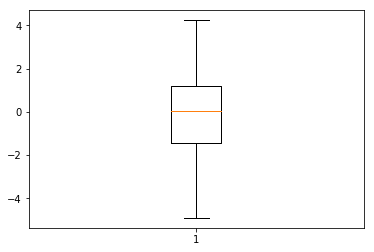

In [29]:
#perform  outlier treatment on each pc's  as the outlier  may severly  affect clustering 
# outlier treatment for PC1
Q1 = country_pca.PC1.quantile(0.25)
Q3 = country_pca.PC1.quantile(0.75)
IQR = Q3 - Q1
country_pca = country_pca[(country_pca.PC1 >= Q1 - 1.5*IQR) & (country_pca.PC1 <= Q3 + 1.5*IQR)]
plt.boxplot(country_pca.PC1)

In [30]:
# outlier treatment for PC2
Q1 = country_pca.PC2.quantile(0.25)
Q3 = country_pca.PC2.quantile(0.75)
IQR = Q3 - Q1
country_pca = country_pca[(country_pca.PC2 >= Q1 - 1.5*IQR) & (country_pca.PC2 <= Q3 + 1.5*IQR)]
plt.boxplot(country_pca.PC2)

{'whiskers': [<matplotlib.lines.Line2D at 0xbc2efd0>,
 'caps': [<matplotlib.lines.Line2D at 0xbc35860>,
 'boxes': [<matplotlib.lines.Line2D at 0xbc2ea58>],
 'medians': [<matplotlib.lines.Line2D at 0xbc35dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0xbc3f588>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0xbc86da0>,
 'caps': [<matplotlib.lines.Line2D at 0xbc8f630>,
 'boxes': [<matplotlib.lines.Line2D at 0xbc86828>],
 'medians': [<matplotlib.lines.Line2D at 0xbc8fef0>],
 'fliers': [<matplotlib.lines.Line2D at 0xbc8ffd0>],
 'means': []}

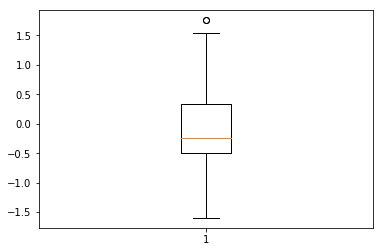

In [31]:
# outlier treatment for PC3
Q1 = country_pca.PC3.quantile(0.25)
Q3 = country_pca.PC3.quantile(0.75)
IQR = Q3 - Q1
country_pca = country_pca[(country_pca.PC3 >= Q1 - 1.5*IQR) & (country_pca.PC3 <= Q3 + 1.5*IQR)]
plt.boxplot(country_pca.PC3)

In [32]:
# outlier treatment for PC4
Q1 = country_pca.PC4.quantile(0.25)
Q3 = country_pca.PC4.quantile(0.75)
IQR = Q3 - Q1
country_pca = country_pca[(country_pca.PC4 >= Q1 - 1.5*IQR) & (country_pca.PC4 <= Q3 + 1.5*IQR)]
plt.boxplot(country_pca.PC4)

{'whiskers': [<matplotlib.lines.Line2D at 0xb719208>,
 'caps': [<matplotlib.lines.Line2D at 0xb719630>,
 'boxes': [<matplotlib.lines.Line2D at 0xb719e80>],
 'medians': [<matplotlib.lines.Line2D at 0xbb1a7b8>],
 'fliers': [<matplotlib.lines.Line2D at 0xb6d14a8>],
 'means': []}

In [33]:
# outlier treatment for PC5
Q1 = country_pca.PC5.quantile(0.25)
Q3 = country_pca.PC5.quantile(0.75)
IQR = Q3 - Q1
country_pca = country_pca[(country_pca.PC5 >= Q1 - 1.5*IQR) & (country_pca.PC5 <= Q3 + 1.5*IQR)]
plt.boxplot(country_pca.PC5)

{'whiskers': [<matplotlib.lines.Line2D at 0x547fa58>,
 'caps': [<matplotlib.lines.Line2D at 0x54655f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x547fef0>],
 'medians': [<matplotlib.lines.Line2D at 0x5458400>],
 'fliers': [<matplotlib.lines.Line2D at 0x5458b00>],
 'means': []}

In [34]:
#remove country column from
country1=country_pca.country
country_pca1=country_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

country_pca1
#country1

PC1       PC2       PC3       PC4       PC5
0   -2.913000  0.091969 -0.721242  1.001838 -0.146765
1    0.429870 -0.589373 -0.328611 -1.165014  0.153205
2   -0.285289 -0.452139  1.232051 -0.857767  0.191227
3   -2.932714  1.698771  1.525076  0.855595 -0.214778
4    1.033371  0.133853 -0.216699 -0.846638 -0.193186
5    0.022890 -1.772736  0.864500 -0.036747  0.997895
6   -0.101463 -0.567318  0.248107 -1.466023 -0.085832
7    2.342153 -1.989710  0.198795  1.113413 -0.710654
8    2.973841 -0.735152 -0.528284  1.201101  0.080167
9   -0.181303 -0.396895  0.868399 -0.435201  0.120357
10   1.268740 -0.658658 -0.484555  0.053945 -0.398859
11   1.671024  0.563934  0.997464 -0.197912 -0.378991
12  -1.123979 -0.961083  0.542964 -1.189204 -0.688348
13   1.081196 -0.484983 -0.658991 -0.526571 -0.008862
14   0.580574  0.541405  0.471986 -1.042085  0.784712
15   3.143756  0.662482 -0.659855  1.087644  0.445979
16   0.210908  0.695633 -0.261731 -1.094244 -0.285266
18  -0.156696  0.776113 -0.279266 -1.042724  0.097584
19  -0.794151 -0.120997  0.414132 -0.717824 -0.206041
20   0.995909 -0.974806 -1.534071 -0.638488  0.900375
21  -0.881576  0.460256 -0.602232  0.394024  0.248934
22   0.141007 -2.149631 -0.169567 -0.170220  0.284366
24   0.906504  0.028728 -0.465601 -0.999039 -0.018948
25  -3.122430  0.034132 -0.448309  1.085256 -0.705788
26  -2.898911 -0.426694 -1.360086  1.809782  0.742353
27  -0.582622  0.892420 -0.494662 -0.808601 -0.156298
29   2.543776 -1.727357 -0.401760  1.334434  0.070455
30  -0.156105  0.346726 -0.277912 -1.341779 -0.538943
32  -3.558249  1.283684 -0.093900  1.219203 -1.193889
33   0.951656 -1.075390  0.155563 -0.436591  0.432360
..        ...       ...       ...       ...       ...
132 -3.381422 -0.234852 -1.400625  2.563263  1.038041
134  2.029661  1.049005 -0.863287 -0.382333  0.442523
135  2.279298  0.192449 -0.802426 -0.073966  0.239159
136 -0.806093  1.299937 -1.240227 -0.056843  0.773509
137 -1.191245 -0.553842 -0.730236  0.538689 -0.109324
138  1.918016 -0.427112  0.145716 -0.470615 -0.136314
139  2.019143 -1.786179 -0.373238  0.264334 -0.194777
140 -0.575132 -0.989932  1.755726 -1.369302  0.473650
141  0.026671 -0.016991 -0.033020 -1.225350 -0.296906
142 -2.319441 -0.767381  0.735848  0.499157  0.297274
143  0.171654 -0.094243  0.016510 -0.377212  0.110093
144  2.818263 -0.915851 -0.101273  1.245701 -0.309937
145  4.088623 -0.429291 -0.276359  2.306719 -0.184681
146 -1.244377 -0.029404 -0.153758 -0.485148  0.417518
147 -2.554170 -0.217996 -0.077956  0.467171 -0.444480
148  0.925809  0.827979  0.352726 -1.591559 -0.193911
150 -1.997994  0.952271 -1.217241  0.555483 -0.395010
151 -0.755117 -0.093367 -0.410624 -0.854013 -0.266630
152  0.601940  0.171081 -0.234296 -1.118931  0.140118
153  0.401370 -1.412286  0.237246 -0.559342 -0.070378
154 -0.464512  1.290702  0.618455 -0.927497 -1.085312
155 -2.854881 -0.355787 -0.699311  1.294060  0.089552
156  0.302728 -0.092996 -0.103870 -0.890837  1.034368
158  2.067999 -1.536828 -0.249088  0.792830 -0.223893
160  0.617287 -1.431525 -0.235307 -0.359604  0.118536
161 -0.853238 -0.649521  0.617276 -0.722564  0.492597
162 -0.820753  0.636404 -0.379488 -0.706886 -0.400381
164  0.498570  1.392777 -0.252849 -1.085037  1.156471
165 -1.887294 -0.105397  1.107639  0.062636  0.665467
166 -2.863885  0.487336  0.221918  0.818991 -0.265921

[143 rows x 5 columns]

In [35]:
#inspect the shape of df after outlier treatment
country_pca1.shape

(143, 5)

In [36]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [37]:
#Let's check the Hopkins measure
hopkins(country_pca1)

0.6848932123878643

In [38]:
#the value is  high
#above 0.5  , good chances of clustering
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_pca1)
    sse_.append([k, silhouette_score(country_pca1, kmeans.labels_)])

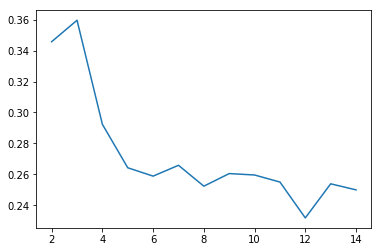

In [39]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [40]:
## From the above analysis we find that 4 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,20)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_pca1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [41]:

#let us proceed with cluster 6

model_clus6 = KMeans(n_clusters = 6,random_state = 42)
model_clus6.fit(country_pca1)
country_pca1.shape

(143, 5)

In [42]:
country_pca1.index = pd.RangeIndex(len(country_pca1.index))
c_pca_km = pd.concat([country_pca1, pd.Series(model_clus6.labels_)], axis=1)
c_pca_km.columns = ['PC1', 'PC2','PC3', 'PC4', 'PC5','ClusterID']
c_pca_km

PC1       PC2       PC3       PC4       PC5  ClusterID
0   -2.913000  0.091969 -0.721242  1.001838 -0.146765          4
1    0.429870 -0.589373 -0.328611 -1.165014  0.153205          0
2   -0.285289 -0.452139  1.232051 -0.857767  0.191227          0
3   -2.932714  1.698771  1.525076  0.855595 -0.214778          5
4    1.033371  0.133853 -0.216699 -0.846638 -0.193186          3
5    0.022890 -1.772736  0.864500 -0.036747  0.997895          0
6   -0.101463 -0.567318  0.248107 -1.466023 -0.085832          0
7    2.342153 -1.989710  0.198795  1.113413 -0.710654          2
8    2.973841 -0.735152 -0.528284  1.201101  0.080167          2
9   -0.181303 -0.396895  0.868399 -0.435201  0.120357          0
10   1.268740 -0.658658 -0.484555  0.053945 -0.398859          3
11   1.671024  0.563934  0.997464 -0.197912 -0.378991          3
12  -1.123979 -0.961083  0.542964 -1.189204 -0.688348          0
13   1.081196 -0.484983 -0.658991 -0.526571 -0.008862          3
14   0.580574  0.541405  0.471986 -1.042085  0.784712          3
15   3.143756  0.662482 -0.659855  1.087644  0.445979          2
16   0.210908  0.695633 -0.261731 -1.094244 -0.285266          1
17  -0.156696  0.776113 -0.279266 -1.042724  0.097584          1
18  -0.794151 -0.120997  0.414132 -0.717824 -0.206041          0
19   0.995909 -0.974806 -1.534071 -0.638488  0.900375          3
20  -0.881576  0.460256 -0.602232  0.394024  0.248934          1
21   0.141007 -2.149631 -0.169567 -0.170220  0.284366          0
22   0.906504  0.028728 -0.465601 -0.999039 -0.018948          3
23  -3.122430  0.034132 -0.448309  1.085256 -0.705788          4
24  -2.898911 -0.426694 -1.360086  1.809782  0.742353          4
25  -0.582622  0.892420 -0.494662 -0.808601 -0.156298          1
26   2.543776 -1.727357 -0.401760  1.334434  0.070455          2
27  -0.156105  0.346726 -0.277912 -1.341779 -0.538943          1
28  -3.558249  1.283684 -0.093900  1.219203 -1.193889          4
29   0.951656 -1.075390  0.155563 -0.436591  0.432360          0
..        ...       ...       ...       ...       ...        ...
113 -3.381422 -0.234852 -1.400625  2.563263  1.038041          4
114  2.029661  1.049005 -0.863287 -0.382333  0.442523          3
115  2.279298  0.192449 -0.802426 -0.073966  0.239159          3
116 -0.806093  1.299937 -1.240227 -0.056843  0.773509          1
117 -1.191245 -0.553842 -0.730236  0.538689 -0.109324          1
118  1.918016 -0.427112  0.145716 -0.470615 -0.136314          3
119  2.019143 -1.786179 -0.373238  0.264334 -0.194777          2
120 -0.575132 -0.989932  1.755726 -1.369302  0.473650          0
121  0.026671 -0.016991 -0.033020 -1.225350 -0.296906          0
122 -2.319441 -0.767381  0.735848  0.499157  0.297274          5
123  0.171654 -0.094243  0.016510 -0.377212  0.110093          0
124  2.818263 -0.915851 -0.101273  1.245701 -0.309937          2
125  4.088623 -0.429291 -0.276359  2.306719 -0.184681          2
126 -1.244377 -0.029404 -0.153758 -0.485148  0.417518          1
127 -2.554170 -0.217996 -0.077956  0.467171 -0.444480          4
128  0.925809  0.827979  0.352726 -1.591559 -0.193911          3
129 -1.997994  0.952271 -1.217241  0.555483 -0.395010          4
130 -0.755117 -0.093367 -0.410624 -0.854013 -0.266630          1
131  0.601940  0.171081 -0.234296 -1.118931  0.140118          3
132  0.401370 -1.412286  0.237246 -0.559342 -0.070378          0
133 -0.464512  1.290702  0.618455 -0.927497 -1.085312          1
134 -2.854881 -0.355787 -0.699311  1.294060  0.089552          4
135  0.302728 -0.092996 -0.103870 -0.890837  1.034368          3
136  2.067999 -1.536828 -0.249088  0.792830 -0.223893          2
137  0.617287 -1.431525 -0.235307 -0.359604  0.118536          0
138 -0.853238 -0.649521  0.617276 -0.722564  0.492597          0
139 -0.820753  0.636404 -0.379488 -0.706886 -0.400381          1
140  0.498570  1.392777 -0.252849 -1.085037  1.156471          3
141 -1.887294 -0.105397  1.107639  0.062636  0.665467          5
142 -2.863885  0.487336  0.221918  0.818991 -

In [43]:
country1 = country1.reset_index()
final_c_pca=pd.concat([country1,c_pca_km ], axis=1)
final_c_pca.drop('index', axis=1,inplace=True)
final_c_pca

country       PC1       PC2       PC3       PC4  \
0                       Afghanistan -2.913000  0.091969 -0.721242  1.001838   
1                           Albania  0.429870 -0.589373 -0.328611 -1.165014   
2                           Algeria -0.285289 -0.452139  1.232051 -0.857767   
3                            Angola -2.932714  1.698771  1.525076  0.855595   
4               Antigua and Barbuda  1.033371  0.133853 -0.216699 -0.846638   
5                         Argentina  0.022890 -1.772736  0.864500 -0.036747   
6                           Armenia -0.101463 -0.567318  0.248107 -1.466023   
7                         Australia  2.342153 -1.989710  0.198795  1.113413   
8                           Austria  2.973841 -0.735152 -0.528284  1.201101   
9                        Azerbaijan -0.181303 -0.396895  0.868399 -0.435201   
10                          Bahamas  1.268740 -0.658658 -0.484555  0.053945   
11                          Bahrain  1.671024  0.563934  0.997464 -0.197912   
12                       Bangladesh -1.123979 -0.961083  0.542964 -1.189204   
13                         Barbados  1.081196 -0.484983 -0.658991 -0.526571   
14                          Belarus  0.580574  0.541405  0.471986 -1.042085   
15                          Belgium  3.143756  0.662482 -0.659855  1.087644   
16                           Belize  0.210908  0.695633 -0.261731 -1.094244   
17                           Bhutan -0.156696  0.776113 -0.279266 -1.042724   
18                          Bolivia -0.794151 -0.120997  0.414132 -0.717824   
19           Bosnia and Herzegovina  0.995909 -0.974806 -1.534071 -0.638488   
20                         Botswana -0.881576  0.460256 -0.602232  0.394024   
21                           Brazil  0.141007 -2.149631 -0.169567 -0.170220   
22                         Bulgaria  0.906504  0.028728 -0.465601 -0.999039   
23                     Burkina Faso -3.122430  0.034132 -0.448309  1.085256   
24                          Burundi -2.898911 -0.426694 -1.360086  1.809782   
25                         Cambodia -0.582622  0.892420 -0.494662 -0.808601   
26                           Canada  2.543776 -1.727357 -0.401760  1.334434   
27                       Cape Verde -0.156105  0.346726 -0.277912 -1.341779   
28                             Chad -3.558249  1.283684 -0.093900  1.219203   
29                            Chile  0.951656 -1.075390  0.155563 -0.436591   
..                              ...       ...       ...       ...       ...   
113                    Sierra Leone -3.381422 -0.234852 -1.400625  2.563263   
114                 Slovak Republic  2.029661  1.049005 -0.863287 -0.382333   
115                        Slovenia  2.279298  0.192449 -0.802426 -0.073966   
116                 Solomon Islands -0.806093  1.299937 -1.240227 -0.056843   
117                    South Africa -1.191245 -0.553842 -0.730236  0.538689   
118                     South Korea  1.918016 -0.427112  0.145716 -0.470615   
119                           Spain  2.019143 -1.786179 -0.373238  0.264334   
120                       Sri Lanka -0.575132 -0.989932  1.755726 -1.369302   
121  St. Vincent and the Grenadines  0.026671 -0.016991 -0.033020 -1.225350   
122                           Sudan -2.319441 -0.767381  0.735848  0.499157   
123                        Suriname  0.171654 -0.094243  0.016510 -0.377212   
124                          Sweden  2.818263 -0.915851 -0.101273  1.245701   
125                     Switzerland  4.088623 -0.429291 -0.276359  2.306719   
126                      Tajikistan -1.244377 -0.029404 -0.153758 -0.485148   
127                        Tanzania -2.554170 -0.217996 -0.077956  0.467171   
128                        Thailand  0.925809  0.827979  0.352726 -1.591559   
129                            Togo -1.997994  0.952271 -1.217241  0.555483   
130                           Tonga -0.755117 -0.093367 -0.410624 -0.854013   
131                         Tunisia  0.601940  0.171081 -0.234296 -1.118931   

In [44]:
#merging
final_df=pd.merge(complete_df, final_c_pca[['country','ClusterID']], on='country', how='left')
final_df.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp              country       PC1       PC2       PC3  \
0       5.82    553          Afghanistan -2.913000  0.091969 -0.721242   
1       1.65   4090              Albania  0.429870 -0.589373 -0.328611   
2       2.89   4460              Algeria -0.285289 -0.452139  1.232051   
3       6.16   3530               Angola -2.932714  1.698771  1.525076   
4       2.13  12200  Antigua and Barbuda  1.033371  0.133853 -0.216699   

        PC4       PC5  ClusterID  
0  1.001838 -0.146765        4.0  
1 -1.165014  0.153205        0.0  
2 -0.857767  0.191227        0.0  
3  0.855595 -0.214778        5.0  
4 -0.846638 -0.193186        3.0

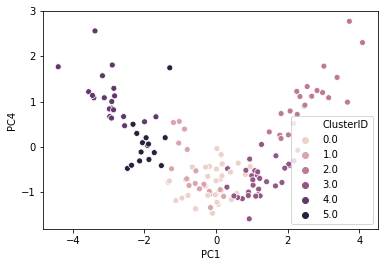

In [45]:
#let us visualise the pc1, pc4 with cluster id
sns.scatterplot(x='PC1',y='PC4',hue='ClusterID',legend='full',data=final_df)

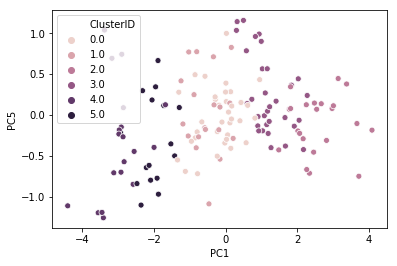

In [46]:
sns.scatterplot(x='PC1',y='PC5',hue='ClusterID',legend='full',data=final_df)

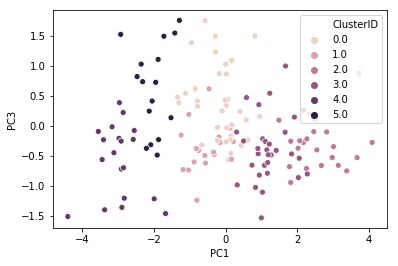

In [47]:
sns.scatterplot(x='PC1',y='PC3',hue='ClusterID',legend='full',data=final_df)

In [48]:
#let us visualise cluster with different factors
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',legend='full',data=final_df)


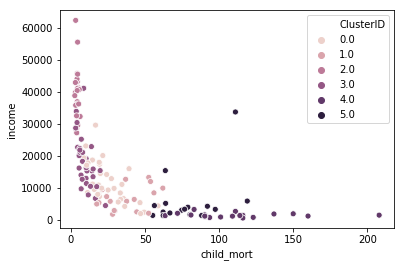

In [49]:

#let us visualise cluster with different factors
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',legend='full',data=final_df)


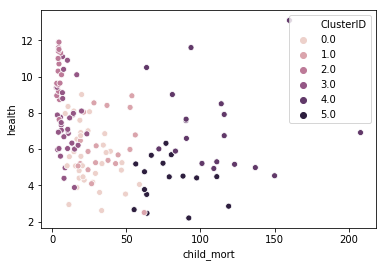

In [50]:
#As  expected  it is inversely proportional
#let us visualise cluster with different factors
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',legend='full',data=final_df)


In [51]:
#from above visualisation it is seen points belonging to the same  cluster are together
km_clusters_child_mort = pd.DataFrame(final_df.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(final_df.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(final_df.groupby(["ClusterID"]).health .mean())
km_clusters_imports = pd.DataFrame(final_df.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(final_df.groupby(["ClusterID"]).income .mean())
km_clusters_inflation = pd.DataFrame(final_df.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(final_df.groupby(["ClusterID"]).life_expec .mean())
km_clusters_total_fer = pd.DataFrame(final_df.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(final_df.groupby(["ClusterID"]).gdpp.mean())


In [52]:
df2 = pd.concat([pd.Series([0, 1, 2, 3, 4, 5]),km_clusters_child_mort, km_clusters_exports,km_clusters_health, km_clusters_imports, km_clusters_income,km_clusters_inflation,km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)

              

df2.columns = ["ClusterID","child_mort_m","exports_m","health_m","imports_m", "income_m", "inflation_m" , "lexp_m", "fer_m","gdpp_m"]
df2

ClusterID  child_mort_m  exports_m   health_m  imports_m      income_m  \
0          0     25.031429  28.930857   5.600286  31.940000  11622.285714   
1          1     35.578947  44.200000   6.144737  58.873684   6790.000000   
2          2      4.159091  42.018182  10.177727  39.268182  39850.000000   
3          3      9.756250  53.628125   7.369375  58.340625  18301.875000   
4          4    111.010526  24.643158   7.268421  40.468421   1496.578947   
5          5     78.037500  36.586875   4.258125  39.837500   5826.250000   

   inflation_m     lexp_m     fer_m        gdpp_m  
0     9.391886  73.054286  2.317143   5689.142857  
1     5.806053  66.952632  3.232105   3413.368421  
2     1.340136  80.990909  1.805455  45281.818182  
3     3.435094  75.781250  1.687187  11455.625000  
4     8.797368  55.794737  5.607368    621.473684  
5    13.493750  63.643750  4.706250   2737.062500

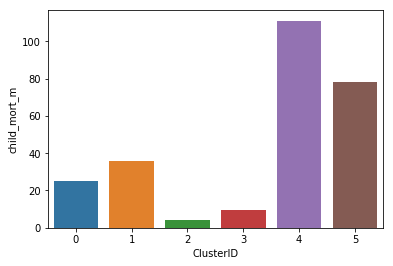

In [53]:
sns.barplot(x=df2.ClusterID, y=df2.child_mort_m)

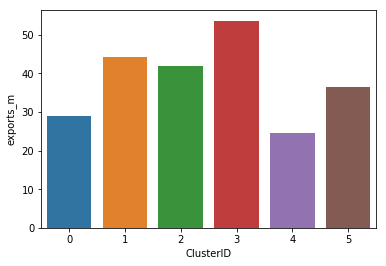

In [54]:
sns.barplot(x=df2.ClusterID, y=df2.exports_m)

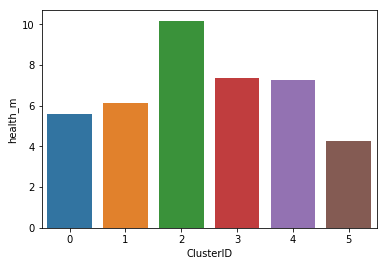

In [55]:
sns.barplot(x=df2.ClusterID, y=df2.health_m)

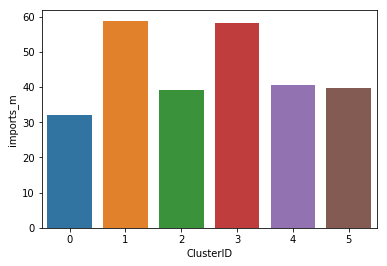

In [56]:
sns.barplot(x=df2.ClusterID, y=df2.imports_m)

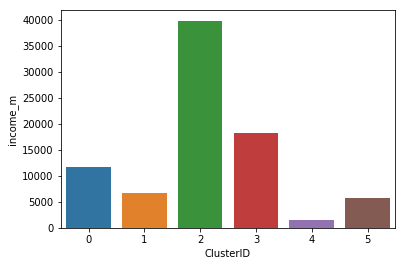

In [57]:
sns.barplot(x=df2.ClusterID, y=df2.income_m)

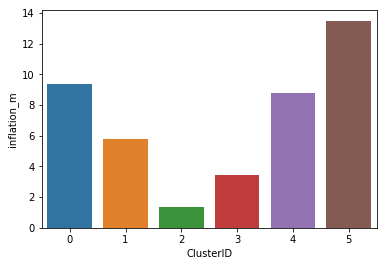

In [58]:
sns.barplot(x=df2.ClusterID, y=df2.inflation_m)

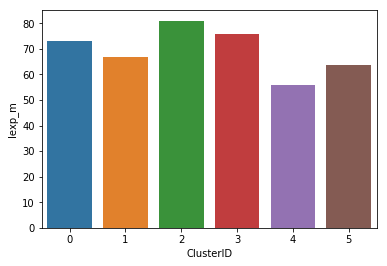

In [59]:
sns.barplot(x=df2.ClusterID, y=df2.lexp_m)

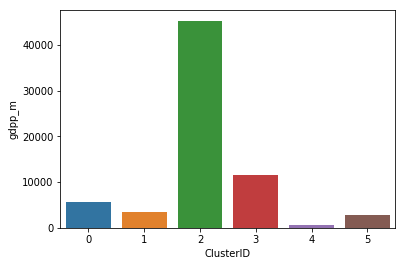

In [60]:
sns.barplot(x=df2.ClusterID, y=df2.gdpp_m)

In [61]:
final_df[final_df['ClusterID']==4]['country']

0           Afghanistan
25         Burkina Faso
26              Burundi
32                 Chad
37     Congo, Dem. Rep.
40        Cote d'Ivoire
63               Guinea
64        Guinea-Bissau
66                Haiti
94               Malawi
97                 Mali
106          Mozambique
112               Niger
126              Rwanda
132        Sierra Leone
147            Tanzania
150                Togo
155              Uganda
166              Zambia
Name: country, dtype: object

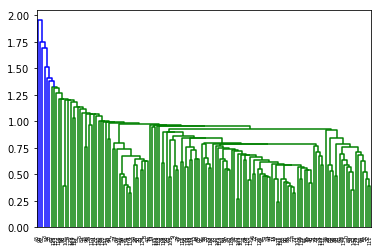

In [62]:
# heirarchical clustering
mergings = linkage(country_pca1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

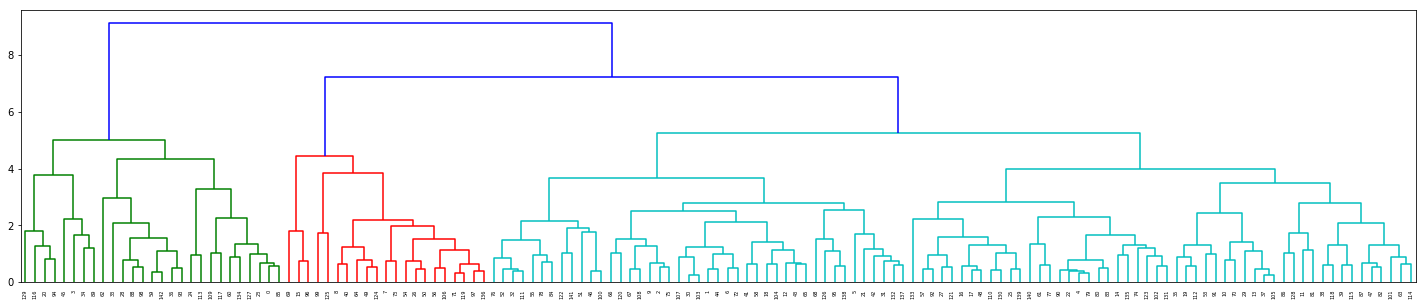

In [63]:
plt.figure(figsize=(25,5))
mergings = linkage(country_pca1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [64]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
country_pca_hc = pd.concat([country_pca1, clusterCut], axis=1)
country_pca_hc.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','ClusterID']

In [65]:
country_pca_hc.head()

PC1       PC2       PC3       PC4       PC5  ClusterID
0 -2.913000  0.091969 -0.721242  1.001838 -0.146765          0
1  0.429870 -0.589373 -0.328611 -1.165014  0.153205          1
2 -0.285289 -0.452139  1.232051 -0.857767  0.191227          1
3 -2.932714  1.698771  1.525076  0.855595 -0.214778          2
4  1.033371  0.133853 -0.216699 -0.846638 -0.193186          3

In [66]:
final_c_pca2=pd.concat([country1,country_pca_hc ], axis=1)
final_c_pca2.drop('index', axis=1,inplace=True)
final_c_pca2.head()

country       PC1       PC2       PC3       PC4       PC5  \
0          Afghanistan -2.913000  0.091969 -0.721242  1.001838 -0.146765   
1              Albania  0.429870 -0.589373 -0.328611 -1.165014  0.153205   
2              Algeria -0.285289 -0.452139  1.232051 -0.857767  0.191227   
3               Angola -2.932714  1.698771  1.525076  0.855595 -0.214778   
4  Antigua and Barbuda  1.033371  0.133853 -0.216699 -0.846638 -0.193186   

   ClusterID  
0          0  
1          1  
2          1  
3          2  
4          3

In [67]:
#merging
final_df2=pd.merge(complete_df, final_c_pca2[['country','ClusterID']], on='country', how='left')
final_df2.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp              country       PC1       PC2       PC3  \
0       5.82    553          Afghanistan -2.913000  0.091969 -0.721242   
1       1.65   4090              Albania  0.429870 -0.589373 -0.328611   
2       2.89   4460              Algeria -0.285289 -0.452139  1.232051   
3       6.16   3530               Angola -2.932714  1.698771  1.525076   
4       2.13  12200  Antigua and Barbuda  1.033371  0.133853 -0.216699   

        PC4       PC5  ClusterID  
0  1.001838 -0.146765        0.0  
1 -1.165014  0.153205        1.0  
2 -0.857767  0.191227        1.0  
3  0.855595 -0.214778        2.0  
4 -0.846638 -0.193186        3.0

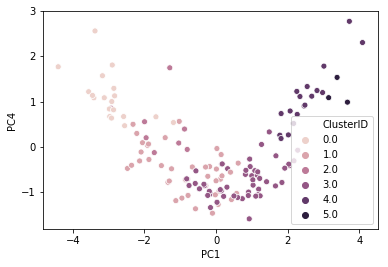

In [68]:
#let us visualise the pc1, pc4 with cluster id
sns.scatterplot(x='PC1',y='PC4',hue='ClusterID',legend='full',data=final_df2)

In [69]:
sns.scatterplot(x='PC1',y='PC5',hue='ClusterID',legend='full',data=final_df2)

In [70]:
#let us visualise cluster with different factors
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',legend='full',data=final_df2)


In [71]:

#let us visualise cluster with different factors
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',legend='full',data=final_df2)


In [72]:

#let us visualise cluster with different factors
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',legend='full',data=final_df2)


In [73]:
#like k means clustering here also the tightness of the cluster is good  in obove visualisation
h_clusters_child_mort = pd.DataFrame(final_df2.groupby(["ClusterID"]).child_mort.mean())
h_clusters_exports = pd.DataFrame(final_df2.groupby(["ClusterID"]).exports.mean())
h_clusters_health = pd.DataFrame(final_df2.groupby(["ClusterID"]).health .mean())
h_clusters_imports = pd.DataFrame(final_df2.groupby(["ClusterID"]).imports.mean())
h_clusters_income = pd.DataFrame(final_df2.groupby(["ClusterID"]).income .mean())
h_clusters_inflation = pd.DataFrame(final_df2.groupby(["ClusterID"]).inflation.mean())
h_clusters_life_expec = pd.DataFrame(final_df2.groupby(["ClusterID"]).life_expec .mean())
h_clusters_total_fer = pd.DataFrame(final_df2.groupby(["ClusterID"]).total_fer.mean())
h_clusters_gdpp = pd.DataFrame(final_df2.groupby(["ClusterID"]).gdpp.mean())


In [74]:
df3 = pd.concat([pd.Series([0,1,2,3,4,5]),h_clusters_child_mort, h_clusters_exports,h_clusters_health, h_clusters_imports, h_clusters_income,h_clusters_inflation,h_clusters_life_expec, h_clusters_total_fer, h_clusters_gdpp], axis=1)

              

df3.columns = ["ClusterID","child_mort_m2","exports_m2","health_m2","imports_m2", "income_m2", "inflation_m2" , "lexp_m2", "fer_m2","gdpp_m2"]
df3.head()

ClusterID  child_mort_m2  exports_m2  health_m2  imports_m2     income_m2  \
0          0     109.084211   24.032632   7.336316   38.894737   2064.473684   
1          1      39.639535   26.271395   5.347674   31.841860   8742.790698   
2          2      77.275000   58.100000   5.685000   58.525000   9107.500000   
3          3      15.988462   50.115385   6.685000   57.042308  15090.000000   
4          4       4.094444   35.444444  10.249444   33.677778  39711.111111   

   inflation_m2    lexp_m2    fer_m2       gdpp_m2  
0      9.069474  55.563158  5.487368    978.947368  
1     10.478140  70.244186  3.010930   4043.046512  
2     13.421250  60.712500  4.611250   4736.000000  
3      3.913923  74.075000  2.129808   9354.153846  
4      1.566944  81.072222  1.721667  45677.777778

In [75]:
sns.barplot(x=df3.ClusterID, y=df3.child_mort_m2)

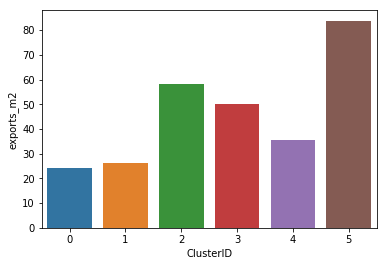

In [76]:
sns.barplot(x=df3.ClusterID, y=df3.exports_m2)

In [77]:
sns.barplot(x=df3.ClusterID, y=df3.health_m2)

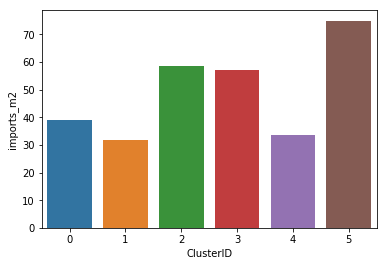

In [78]:
sns.barplot(x=df3.ClusterID, y=df3.imports_m2)

In [79]:
sns.barplot(x=df3.ClusterID, y=df3.income_m2)

In [80]:
sns.barplot(x=df3.ClusterID, y=df3.inflation_m2)

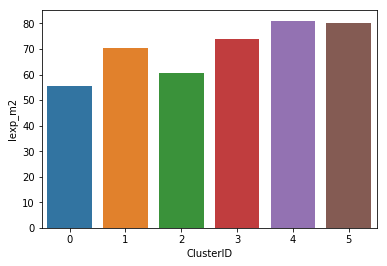

In [81]:
sns.barplot(x=df3.ClusterID, y=df3.lexp_m2)

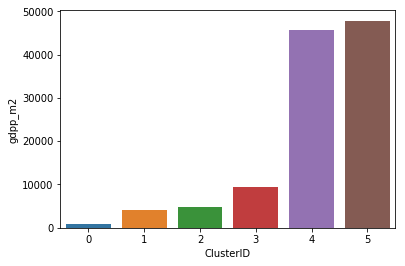

In [82]:
sns.barplot(x=df3.ClusterID, y=df3.gdpp_m2)

In [83]:
final_df2[final_df2['ClusterID']==0]['country']

0           Afghanistan
25         Burkina Faso
26              Burundi
32                 Chad
37     Congo, Dem. Rep.
40        Cote d'Ivoire
63               Guinea
64        Guinea-Bissau
66                Haiti
94               Malawi
97                 Mali
106          Mozambique
112               Niger
126              Rwanda
132        Sierra Leone
137        South Africa
147            Tanzania
155              Uganda
166              Zambia
Name: country, dtype: object